<a href="https://colab.research.google.com/github/AV-BOLT/yandex_practicum/blob/master/yandex_diploma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Телеком

## Описание проекта


Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. Ваша задача — обучить на этих данных модель для прогноза оттока клиентов.

Оператор предоставляет два основных типа услуг:
- Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.
- Интернет. Подключение бывает двух типов:
  - через телефонную линию DSL (англ. digital subscriber line — «цифровая абонентская линия»)
  - оптоволоконный кабель (англ. fiber optic).
- Интернет-безопасность:
   - антивирус (Device Protection)
   - блокировка опасных сайтов (Online Security);
- Выделенная линия технической поддержки (Tech Support);
- Облачное хранилище файлов для резервного копирования данных (Online Backup);
- Стриминговое телевидение (Streaming TV)
- каталог фильмов (Streaming Movies).

За услуги клиенты могут платить ежемесячно или раз в 1–2 года. Доступны различные способы расчёта и возможность получить электронный чек.

## Импорты и загрузка данных

In [220]:


import warnings# мы будем игнорировать warnings
warnings.filterwarnings(action = 'ignore', category = Warning)

from tqdm.autonotebook import tqdm
tqdm.pandas()

# визуализация
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("dark_background")

import matplotlib
matplotlib.rcParams['font.size'] = 13


In [6]:
# только для этой версии работает подключение
!pip install SQLAlchemy==1.4.25
!pip install --upgrade pandas

# Import necessary libraries
from sqlalchemy import create_engine
import pandas as pd


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 54.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for SQLAlchemy: filename=SQLAlchemy-1.4.25-cp310-cp310-linux_x86_64.whl size=1549063 sha256=16d7280338c56c7c2fc8f4f75cb81607012b5c32734df59310f8a8f6c0e835fa
  Stored in directory: /root/.cache/pip/wheels/eb/d2/fb/76e0021c3cf02cb6590cf88ccf6f6e31bcfe8532f422cdf1ed
Successfully built SQLAlchemy
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.23
    Uninstalling SQLAlchemy-2.0.23:
      Successfully uninstalled SQLAlchemy-2.0.23
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.25 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 82.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
RANDOM_STATE = 11122023

In [8]:
db_config = {
'user': 'praktikum_student', # имя пользователя,
'pwd': 'Sdf4$2;d-d30pp', # пароль,
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения,
'db': 'data-science-final' # название базы данных,
}

In [9]:
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

In [10]:
engine = create_engine(connection_string)

**Проверяем наличие и содержание таблиц**

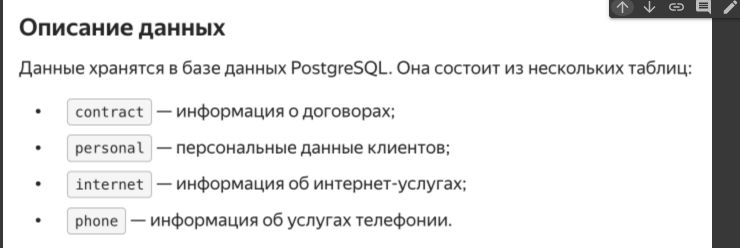

####contract

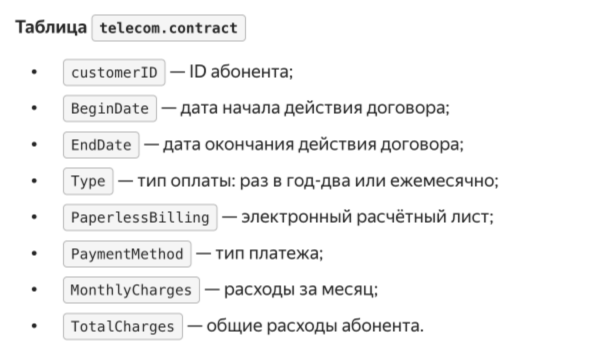

In [11]:
# проверим
query = '''
SELECT *
FROM telecom.contract
LIMIT 10;
'''
example = pd.read_sql_query(query, con = engine)
example

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,4472-LVYGI,2020-02-01,None,Two year,Yes,Bank transfer (automatic),52.55,NaN
1,3115-CZMZD,2020-02-01,None,Two year,No,Mailed check,20.25,NaN
2,3668-QPYBK,2018-08-09,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15
3,5709-LVOEQ,2020-02-01,None,Two year,No,Mailed check,80.85,NaN
4,9237-HQITU,2019-01-26,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2018-12-26,2019-11-01,Month-to-month,Yes,Electronic check,99.65,820.50
6,4367-NUYAO,2020-02-01,None,Two year,No,Mailed check,25.75,NaN
7,1371-DWPAZ,2020-02-01,None,Two year,No,Credit card (automatic),56.05,NaN
8,7892-POOKP,2019-04-27,2019-11-01,Month-to-month,Yes,Electronic check,104.80,3046.05
9,3213-VVOLG,2020-02-01,None,Two year,No,Mailed check,25.35,NaN


Все столбцы имеются

#### personal

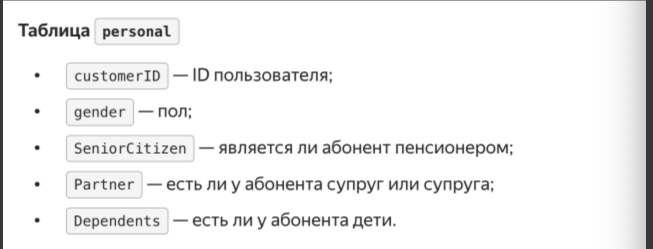

In [23]:
# сохраним датасет
query = '''
SELECT *
FROM telecom.personal
LIMIT 10;
'''
example = pd.read_sql_query(query, con = engine)
example.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
2,3668-QPYBK,Male,0,No,No
0,7590-VHVEG,Female,0,Yes,No
3,7795-CFOCW,Male,0,No,No
9,6388-TABGU,Male,0,No,Yes
4,9237-HQITU,Female,0,No,No


In [24]:
example.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], dtype='object')

####internet

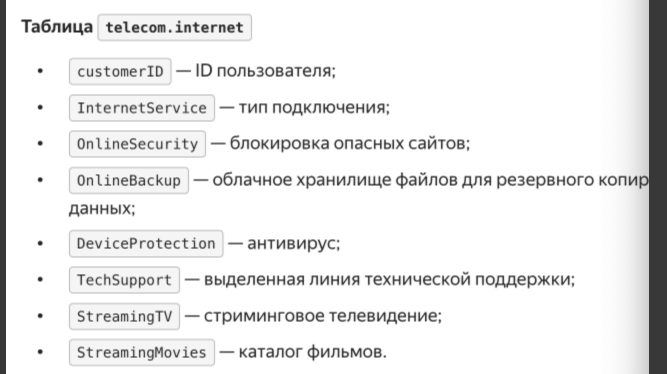

In [18]:
# сохраним датасет
query = '''
SELECT *
FROM telecom.internet
LIMIT 10;
'''
example = pd.read_sql_query(query, con = engine)
example.head()

,c1,c2,c3,c4,c5,c6,c7,c8
0,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
1,7590-VHVEG,DSL,No,Yes,No,No,No,No
2,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
3,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
4,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No


Названия столбцов съехали вниз и теперь они отображены как значения.
- Можно либо объединить это так, имея в виду что с1 это 	customerID
- Заменить названия столбцов

####phone

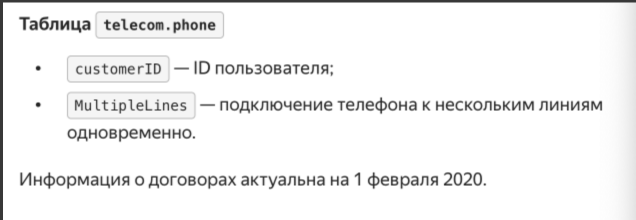

In [19]:
# сохраним датасет
query = '''
SELECT *
FROM telecom.phone
LIMIT 10;
'''
example = pd.read_sql_query(query, con = engine)
example.head(5)

,c1,c2
0,customerID,MultipleLines
1,5575-GNVDE,No
2,3668-QPYBK,No
3,9237-HQITU,No
4,9305-CDSKC,Yes


в данной таблице так же названия съехали вниз

### **Создаем датасет**

Все таблицы имеют общий столбец customerID, кроме таблиц internet и phone,

In [260]:
query = '''
SELECT *
FROM telecom.contract as tc

LEFT JOIN telecom.personal AS tp ON tc."customerID" = tp."customerID"

INNER JOIN telecom.internet AS ti ON tc."customerID" = ti."c1"

INNER JOIN telecom.phone AS tph ON tc."customerID" = tph."c1";
'''

data = pd.read_sql_query(query, con = engine)
data.head(5)


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,customerID,gender,...,c1,c2,c3,c4,c5,c6,c7,c8,c1,c2
0,5575-GNVDE,2019-03-26,None,One year,No,Mailed check,56.95,1889.50,5575-GNVDE,Male,...,5575-GNVDE,DSL,Yes,No,Yes,No,No,No,5575-GNVDE,No
1,3668-QPYBK,2018-08-09,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,3668-QPYBK,Male,...,3668-QPYBK,DSL,Yes,Yes,No,No,No,No,3668-QPYBK,No
2,9237-HQITU,2019-01-26,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,9237-HQITU,Female,...,9237-HQITU,Fiber optic,No,No,No,No,No,No,9237-HQITU,No
3,9305-CDSKC,2018-12-26,2019-11-01,Month-to-month,Yes,Electronic check,99.65,820.50,9305-CDSKC,Female,...,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes,9305-CDSKC,Yes
4,1452-KIOVK,2018-12-20,None,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,1452-KIOVK,Male,...,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No,1452-KIOVK,Yes


In [261]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        4835 non-null   object 
 1   BeginDate         4835 non-null   object 
 2   EndDate           1586 non-null   object 
 3   Type              4835 non-null   object 
 4   PaperlessBilling  4835 non-null   object 
 5   PaymentMethod     4835 non-null   object 
 6   MonthlyCharges    4835 non-null   float64
 7   TotalCharges      4832 non-null   float64
 8   customerID        4835 non-null   object 
 9   gender            4835 non-null   object 
 10  SeniorCitizen     4835 non-null   int64  
 11  Partner           4835 non-null   object 
 12  Dependents        4835 non-null   object 
 13  c1                4835 non-null   object 
 14  c2                4835 non-null   object 
 15  c3                4835 non-null   object 
 16  c4                4835 non-null   object 


- В данных имееюся пропуски.
- Названия признаков записаны в camel формате, необходимо заменить на snacke_case для удобства
- имеются признаки с неинформативными названиями (с1, с2 и тд)

In [262]:
# 1 таблицу мы присоединили internet, поэтому сохраним названия
internet = ['customerID', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',	'TechSupport',	'StreamingTV',	'StreamingMovies']


In [263]:
# 2 таблицу мы присоединили phone, поэтому сохраним названия
phone = ['customerID', 'MultipleLines']


In [264]:
# сохраним список названий признаков
columns = data.columns.to_list()


In [265]:
# привидем к строчному регистру
new_columns = (columns + internet + phone)

list(map(lambda x: x.lower(), new_columns))

['customerid',
 'begindate',
 'enddate',
 'type',
 'paperlessbilling',
 'paymentmethod',
 'monthlycharges',
 'totalcharges',
 'customerid',
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'c1',
 'c2',
 'c3',
 'c4',
 'c5',
 'c6',
 'c7',
 'c8',
 'c1',
 'c2',
 'customerid',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'customerid',
 'multiplelines']

In [266]:
# добавим разделитель и отметим дублирующиеся
columns = [
    'customer_id',
    'begin_date',
    'end_date',
    'type',
    'paperless_billing',
    'payment_method',
    'monthly_charges',
    'total_charges',
    'customer_id1',
    'gender',
    'senior_citizen',
    'partner',
    'dependents',
    'customer_id2',
    'internet_service',
    'online_security',
    'online_backup',
    'device_protection',
    'tech_support',
    'streaming_tv',
    'streaming_movies',
    'customer_id3',
    'multiple_lines']

In [267]:
# сохраним новые названия признаков
data.columns = columns
data.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,customer_id1,gender,...,customer_id2,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,customer_id3,multiple_lines
0,5575-GNVDE,2019-03-26,None,One year,No,Mailed check,56.95,1889.50,5575-GNVDE,Male,...,5575-GNVDE,DSL,Yes,No,Yes,No,No,No,5575-GNVDE,No
1,3668-QPYBK,2018-08-09,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,3668-QPYBK,Male,...,3668-QPYBK,DSL,Yes,Yes,No,No,No,No,3668-QPYBK,No
2,9237-HQITU,2019-01-26,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,9237-HQITU,Female,...,9237-HQITU,Fiber optic,No,No,No,No,No,No,9237-HQITU,No
3,9305-CDSKC,2018-12-26,2019-11-01,Month-to-month,Yes,Electronic check,99.65,820.50,9305-CDSKC,Female,...,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes,9305-CDSKC,Yes
4,1452-KIOVK,2018-12-20,None,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,1452-KIOVK,Male,...,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No,1452-KIOVK,Yes


In [268]:
# удалим дублирующме признаки
data.drop(['customer_id1', 'customer_id2', 'customer_id3'], axis = 1, inplace = True)

In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        4835 non-null   object 
 1   begin_date         4835 non-null   object 
 2   end_date           1586 non-null   object 
 3   type               4835 non-null   object 
 4   paperless_billing  4835 non-null   object 
 5   payment_method     4835 non-null   object 
 6   monthly_charges    4835 non-null   float64
 7   total_charges      4832 non-null   float64
 8   gender             4835 non-null   object 
 9   senior_citizen     4835 non-null   int64  
 10  partner            4835 non-null   object 
 11  dependents         4835 non-null   object 
 12  internet_service   4835 non-null   object 
 13  online_security    4835 non-null   object 
 14  online_backup      4835 non-null   object 
 15  device_protection  4835 non-null   object 
 16  tech_support       4835 

Исходные данные имеют размерность 4835 объекта объекта, 20 признак.

- данные имеют пропуски
- названия признаков перезаписаны в snake_case (изначально были в camel case)
- имеются категориальные и числовые признаки
- вероятно булев тип значений представлен в виде категорий.

## Исследовательский анализ и предобработка данных

##### Типы данных

In [270]:
# оценим типы данных
data.dtypes

customer_id           object
begin_date            object
end_date              object
type                  object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges        float64
gender                object
senior_citizen         int64
partner               object
dependents            object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
multiple_lines        object
dtype: object

- begin_date, object нужно перевести в
pd.datetime
- end_date (object) нужно перевести в
pd.datetime

In [271]:
# заменим на тип данных date
data[['begin_date', 'end_date']] = data[['begin_date', 'end_date']].apply(lambda x: pd.to_datetime(x,
                                                                                                   format = '%Y-%m-%d',
                                                                                                   errors = 'ignore')
                                    )


In [272]:
data[['begin_date', 'end_date']]

,begin_date,end_date
0,2019-03-26,NaT
1,2018-08-09,2019-12-01
2,2019-01-26,2019-11-01
3,2018-12-26,2019-11-01
4,2018-12-20,NaT
...,...,...
4830,2019-06-07,NaT
4831,2019-02-26,NaT
4832,2019-09-02,NaT
4833,2018-12-07,2019-11-01


In [273]:
data[['begin_date', 'end_date']]

,begin_date,end_date
0,2019-03-26,NaT
1,2018-08-09,2019-12-01
2,2019-01-26,2019-11-01
3,2018-12-26,2019-11-01
4,2018-12-20,NaT
...,...,...
4830,2019-06-07,NaT
4831,2019-02-26,NaT
4832,2019-09-02,NaT
4833,2018-12-07,2019-11-01


##### Дупликаты

In [274]:
# проверим дупликаты
data.duplicated(keep = False).sum()

0

Дупликатов нет

##### Пропуски

In [275]:
data.isna().sum()

customer_id             0
begin_date              0
end_date             3249
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           3
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service        0
online_security         0
online_backup           0
device_protection       0
tech_support            0
streaming_tv            0
streaming_movies        0
multiple_lines          0
dtype: int64

Пропусков у нас совсем незначительное количество в признаке total_charges, а в признаке end_date это очевидно объекты для которых нет такой даты

In [276]:
# проверим наше предположение
data.loc[data['end_date'].isna()]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,5575-GNVDE,2019-03-26,NaT,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
4,1452-KIOVK,2018-12-20,NaT,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,Male,0,No,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
6,6388-TABGU,2018-12-17,NaT,One year,No,Bank transfer (automatic),56.15,3487.95,Male,0,No,Yes,DSL,Yes,Yes,No,No,No,No,No
7,9763-GRSKD,2018-12-28,NaT,Month-to-month,Yes,Mailed check,49.95,587.45,Male,0,Yes,Yes,DSL,Yes,No,No,No,No,No,No
8,8091-TTVAX,2019-06-18,NaT,One year,No,Credit card (automatic),100.35,5681.10,Male,0,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4828,9767-FFLEM,2019-07-28,NaT,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,Male,0,No,No,Fiber optic,No,No,No,No,No,No,No
4830,8456-QDAVC,2019-06-07,NaT,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,Male,0,No,No,Fiber optic,No,No,No,No,Yes,No,No
4831,6840-RESVB,2019-02-26,NaT,One year,Yes,Mailed check,84.80,1990.50,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
4832,2234-XADUH,2019-09-02,NaT,One year,Yes,Credit card (automatic),103.20,7362.90,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes


In [277]:
# заменим None на 0
data.loc[data['end_date'].isna(), 'end_date'] = data.loc[data['end_date'].isna(), 'end_date'].fillna(0)

In [278]:
# проверяем
data.isna().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        3
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
multiple_lines       0
dtype: int64

In [279]:
#
data.loc[data['total_charges'].isna()]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
663,5709-LVOEQ,2020-02-01,0,Two year,No,Mailed check,80.85,NaN,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No
4573,4075-WKNIU,2020-02-01,0,Two year,No,Mailed check,73.35,NaN,Female,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes
4630,2775-SEFEE,2020-02-01,0,Two year,Yes,Bank transfer (automatic),61.90,NaN,Male,0,No,Yes,DSL,Yes,Yes,No,Yes,No,No,Yes


Для клиентов кто только начал пользоваться услугами компании (так как база заканачивается февралем 20 года)total_charges обратился в Nan, заменим на 0.

In [280]:
#  заполняем 0
data.loc[data['total_charges'].isna(), 'total_charges'] = 0

In [281]:
# проверяем
data.isna().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
multiple_lines       0
dtype: int64

Проанализируем целевой признак

In [282]:
# создадим новый признак churn на основе end_date
data['churn'] = 0
data.loc[data['end_date'] != 0, 'churn'] = 1
data[['end_date', 'churn']]

,end_date,churn
0,0,0
1,2019-12-01 00:00:00,1
2,2019-11-01 00:00:00,1
3,2019-11-01 00:00:00,1
4,0,0
...,...,...
4830,0,0
4831,0,0
4832,0,0
4833,2019-11-01 00:00:00,1


Далее будем анализировать отдельно категориальные и отдельно числовые, для этого создадим функцию для отбора признаков по типу

In [283]:
# добавим функцию для выделения типа признаков

#отбирает категориальные
def is_categorical(data):
    return data.select_dtypes(include = 'object').columns.to_list()

#отбирает числовые
def is_numeric(data):
    return data.select_dtypes(exclude = 'object').columns.to_list()

#### Анализ категориальных

In [284]:
# создаем список категориальных
categorical = is_categorical(data)

In [285]:
# оценим что содержат в себе эти данные
data[categorical].head()

,customer_id,end_date,type,paperless_billing,payment_method,gender,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,5575-GNVDE,0,One year,No,Mailed check,Male,No,No,DSL,Yes,No,Yes,No,No,No,No
1,3668-QPYBK,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,Male,No,No,DSL,Yes,Yes,No,No,No,No,No
2,9237-HQITU,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,Female,No,No,Fiber optic,No,No,No,No,No,No,No
3,9305-CDSKC,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,Female,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
4,1452-KIOVK,0,Month-to-month,Yes,Credit card (automatic),Male,No,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes


Много признаков вероятнее всего имеют булев тип. Такие признаки переведем в числовые, для удобства анализа. Для этого мы сохраним их в список to_bool с помощью цикла.
Отбирать будем по условию, что содержит всего 2 уникальных значения

In [286]:
is_bool = []
# найдем булевы типы
for col in categorical:
    if data[col].nunique() == 2:
        is_bool.append(col)
# выведем получившийся список
is_bool

['paperless_billing',
 'gender',
 'partner',
 'dependents',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'multiple_lines']

Признаки отобраны, теперь проанализируем их и затем изменим тип данных на числовой.

In [287]:
# сгруппируем по целевому признаку
for col in is_bool:
    print(data.groupby(col)['churn'].mean())
    print()


paperless_billing
No     0.231129
Yes    0.371480
Name: churn, dtype: float64

gender
Female    0.333195
Male      0.322887
Name: churn, dtype: float64

partner
No     0.405721
Yes    0.246069
Name: churn, dtype: float64

dependents
No     0.366816
Yes    0.218081
Name: churn, dtype: float64

internet_service
DSL            0.166187
Fiber optic    0.418928
Name: churn, dtype: float64

online_security
No     0.425944
Yes    0.153226
Name: churn, dtype: float64

online_backup
No     0.413665
Yes    0.220355
Name: churn, dtype: float64

device_protection
No     0.401030
Yes    0.234294
Name: churn, dtype: float64

tech_support
No     0.423377
Yes    0.160684
Name: churn, dtype: float64

streaming_tv
No     0.346457
Yes    0.309661
Name: churn, dtype: float64

streaming_movies
No     0.349854
Yes    0.306491
Name: churn, dtype: float64

multiple_lines
No     0.338169
Yes    0.319513
Name: churn, dtype: float64



In [294]:
# преобразуем признаки internet_service и gender с помощью dummy
data = pd.get_dummies(data,
                      columns = ['internet_service', 'gender'],
                      drop_first = False)
data.head()


KeyError: ignored

In [293]:
# Приведем к типу 0/1 для удобства анализа
data[['internet_service_DSL', 'internet_service_Fiber optic', 'gender_Female','gender_Male']] = data[['internet_service_DSL', 'internet_service_Fiber optic', 'gender_Female','gender_Male']].astype('int')

In [301]:
# пересоберем
is_bool = []

# найдем булевы типы
for col in is_categorical(data):
    if data[col].nunique() == 2:
        is_bool.append(col)
# выведем получившийся список
data[is_bool]

,paperless_billing,partner,dependents,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,No,No,No,Yes,No,Yes,No,No,No,No
1,Yes,No,No,Yes,Yes,No,No,No,No,No
2,Yes,No,No,No,No,No,No,No,No,No
3,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes
4,Yes,No,Yes,No,Yes,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...
4830,Yes,No,No,No,No,No,No,Yes,No,No
4831,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes
4832,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes
4833,Yes,Yes,No,No,No,No,No,No,No,Yes


Теперь можно заменить на 0 и 1 оставшиеся признаки

In [302]:
# заменим значения yes/no на 0 и 1
data[is_bool] = data[is_bool].applymap(lambda x: 1 if (x == 'Yes') else 0)

In [303]:
data[is_bool]

,paperless_billing,partner,dependents,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,0,0,0,1,0,1,0,0,0,0
1,1,0,0,1,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,1,1,1
4,1,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
4830,1,0,0,0,0,0,0,1,0,0
4831,1,1,1,1,0,1,1,1,1,1
4832,1,1,1,0,1,1,0,1,1,1
4833,1,1,0,0,0,0,0,0,0,1


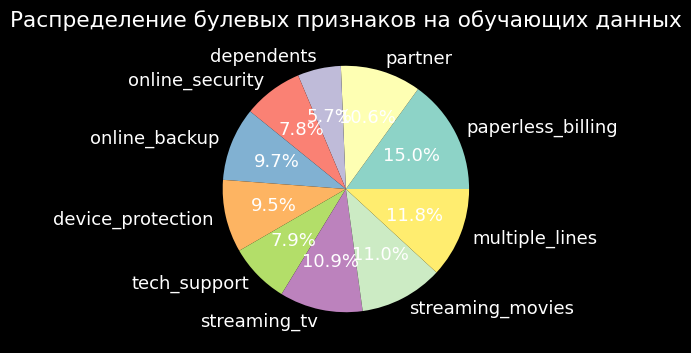

In [309]:
#Визуализируем булевые признаки на круговой диаграмме

count_true = [data[col].sum() for col in is_bool]# считаем единицы

#  круговая диаграмма для булевых признаков
plt.figure(figsize = (4,4))
plt.pie(count_true,
        autopct = "%1.1f%%",
        labels = is_bool)
plt.title('Распределение булевых признаков на обучающих данных')
plt.show()